In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('nursery.csv')
nan_percentage = 0.1
total_cells = df.size
num_nan_values = int(total_cells * nan_percentage)
nan_indices = np.random.choice(df.size, num_nan_values, replace=False)
row_indices, col_indices = np.unravel_index(nan_indices, df.shape)
df.iloc[row_indices, col_indices] = np.nan
df.to_csv('nursery.csv', index=False)


In [3]:
# Identifying the values with null values
dirty_df = pd.read_csv('nursery.csv')

# Finding rows with NaN values
rows_with_nan = dirty_df[dirty_df.isnull().any(axis=1)]

# Printing rows containing NaN values
print("Rows containing NaN values:")
print(rows_with_nan)

Rows containing NaN values:
     parents has_nurs form children housing finance social health  \
3        NaN      NaN  NaN      NaN     NaN     NaN    NaN    NaN   
10       NaN      NaN  NaN      NaN     NaN     NaN    NaN    NaN   
11       NaN      NaN  NaN      NaN     NaN     NaN    NaN    NaN   
12       NaN      NaN  NaN      NaN     NaN     NaN    NaN    NaN   
13       NaN      NaN  NaN      NaN     NaN     NaN    NaN    NaN   
...      ...      ...  ...      ...     ...     ...    ...    ...   
5037     NaN      NaN  NaN      NaN     NaN     NaN    NaN    NaN   
5038     NaN      NaN  NaN      NaN     NaN     NaN    NaN    NaN   
5041     NaN      NaN  NaN      NaN     NaN     NaN    NaN    NaN   
5042     NaN      NaN  NaN      NaN     NaN     NaN    NaN    NaN   
5043     NaN      NaN  NaN      NaN     NaN     NaN    NaN    NaN   

     final evaluation  
3                 NaN  
10                NaN  
11                NaN  
12                NaN  
13                NaN  

In [4]:
#cleaning the data
clean_df = dirty_df.dropna()  # Drop rows with NaN values

# Save cleaned data back to the same CSV file
clean_df.to_csv('nursery.csv', index=False)

In [5]:
#Checking to see if the data is thoroughly cleaned
dirty_df = pd.read_csv('nursery.csv')

# Finding rows with NaN values
rows_with_nan = dirty_df[dirty_df.isnull().any(axis=1)]

# Printing rows containing NaN values
print("Rows containing NaN values:")
print(rows_with_nan)

Rows containing NaN values:
Empty DataFrame
Columns: [parents, has_nurs, form, children, housing, finance, social, health, final evaluation]
Index: []


*Reading Dataset*

In [7]:
df1=pd.read_csv('nursery.csv')
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   parents           1959 non-null   object
 1   has_nurs          1959 non-null   object
 2   form              1959 non-null   object
 3   children          1959 non-null   object
 4   housing           1959 non-null   object
 5   finance           1959 non-null   object
 6   social            1959 non-null   object
 7   health            1959 non-null   object
 8   final evaluation  1959 non-null   object
dtypes: object(9)
memory usage: 137.9+ KB
None


 *Check for missing values*

In [8]:

print(df1.isnull().sum())


parents             0
has_nurs            0
form                0
children            0
housing             0
finance             0
social              0
health              0
final evaluation    0
dtype: int64


*Calculate the number of recommendations for each type of parents*

In [9]:
recommendations_parents = df1[df1['final evaluation'] == 'recommend'].groupby('parents').size()
print(recommendations_parents)

parents
usual    1
dtype: int64


*Calculate the number of recommendations for each type of housing in the dataset.*

In [10]:
recommendations_housing = df1[df1['final evaluation'] == 'recommend'].groupby('housing').size()
print(recommendations_housing)

housing
convenient    1
dtype: int64


*Investigate which type of parents have the most recommendations.*

In [11]:
parents_most_recommendations = recommendations_parents.idxmax()
print("Type of parents with the most recommendations:", parents_most_recommendations)


Type of parents with the most recommendations: usual


*Average number of parents' occupations for each 'Health' condition*

In [25]:
average_parents_per_health = df1.groupby('health')['parents'].count()
print(average_parents_per_health)

health
not_recom      4320
priority       4320
recommended    4320
Name: parents, dtype: int64


*Convert categorical variables to numerical*

In [35]:
le = LabelEncoder()
df1 = df1.apply(le.fit_transform)

*Does the number of children scale proportionally to the type of housing?.*

*Do relationships exist between the broader health status and final evaluation?*

In [37]:
health_final_eval_relationship = df1.groupby(['health', 'final evaluation']).size().unstack(fill_value=0)
print(health_final_eval_relationship)

final evaluation     0     1  2     3    4
health                                    
0                 4320     0  0     0    0
1                    0  1854  0  2466    0
2                    0  2412  2  1578  328


*Are there any noticeable relationships between social status and final evaluation?*

In [38]:
social_final_eval_relationship = df1.groupby(['social', 'final evaluation']).size().unstack(fill_value=0)
print(social_final_eval_relationship)

final evaluation     0     1  2     3    4
social                                    
0                 1440  1515  1  1200  164
1                 1440  1236  0  1644    0
2                 1440  1515  1  1200  164


*Boxplot*

[]

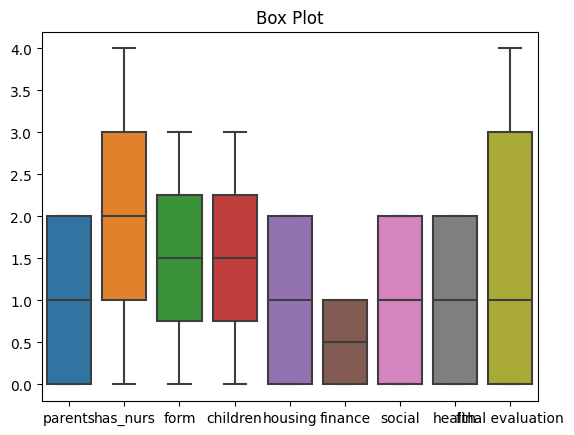

In [13]:
sns.boxplot(data=df1)
plt.title('Box Plot')
plt.plot()

*Split the dataset into features and target variable*

In [5]:
X = df1.drop('final evaluation', axis=1)
y = df1['final evaluation']

*Histogram*

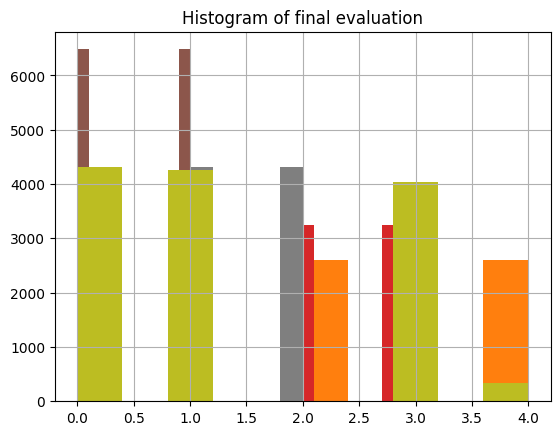

In [16]:
for column in df1.columns:
    df1[column].hist()
    plt.title(f'Histogram of {column}')
    plt.plot()

 *Statistics*


In [17]:
print(df1.describe())

            parents      has_nurs          form      children       housing  \
count  12960.000000  12960.000000  12960.000000  12960.000000  12960.000000   
mean       1.000000      2.000000      1.500000      1.500000      1.000000   
std        0.816528      1.414268      1.118077      1.118077      0.816528   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      1.000000      0.750000      0.750000      0.000000   
50%        1.000000      2.000000      1.500000      1.500000      1.000000   
75%        2.000000      3.000000      2.250000      2.250000      2.000000   
max        2.000000      4.000000      3.000000      3.000000      2.000000   

            finance        social        health  final evaluation  
count  12960.000000  12960.000000  12960.000000      12960.000000  
mean       0.500000      1.000000      1.000000          1.366821  
std        0.500019      0.816528      0.816528          1.294212  
min        0.000

*HeatMap*

[]

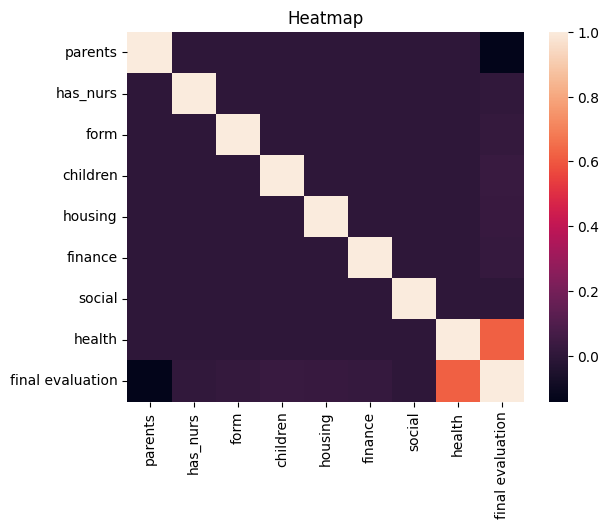

In [19]:
sns.heatmap(df1.corr())
plt.title('Heatmap')
plt.plot()

 *Split the dataset into training set and test set*

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

*Feature scaling*

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

*Train the KNN model*

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

*Make predictions*

In [40]:
y_pred = knn.predict(X_test)

*Evaluate the model*

In [10]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred))

Confusion Matrix:
[[900   0   0   0]
 [  0 776  52  17]
 [  0 159 618   0]
 [  0  14   0  56]]
Accuracy: 0.9066358024691358


In [11]:
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       900
           1       0.82      0.92      0.87       845
           3       0.92      0.80      0.85       777
           4       0.77      0.80      0.78        70

    accuracy                           0.91      2592
   macro avg       0.88      0.88      0.88      2592
weighted avg       0.91      0.91      0.91      2592

